# Описание

*Описание:*

Этот набор данных относится к красным вариантам португальского вина "Винью Верде". Набор данных описывает количество различных химических веществ, присутствующих в вине, и их влияние на его качество. Набор данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и несбалансированы (например, нормальных вин намного больше, чем отличных или плохих). **Моя задача - предсказать качество вина, используя предоставленные данные.**

Простой, но сложный проект по прогнозированию качества вина.
Сложность возникает из-за того, что набор данных содержит меньше образцов и сильно несбалансирован.

Этот фрейм данных содержит следующие столбцы:

*Входные переменные:*

1. - фиксированная кислотность
2. - летучая кислотность
3. - лимонная кислота
4. - остаточный сахар
5. - хлориды
6. - свободный диоксид серы
7. - общий диоксид серы
8. - плотность
9. - pH
10. - сульфаты
11. - алкоголь

*Выходная переменная:*

12 - качество (оценка от 0 до 10)

# Первичный анализ данных

In [40]:
import pandas as pd
vine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=';')
vine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Посчитаем количество 0

In [41]:
vine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Названия колонок

In [42]:
vine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Размер

In [43]:
vine.shape

(1599, 12)

Удаляем повторы

In [44]:
print(vine.duplicated().sum())
vine = vine.drop_duplicates()
vine.shape

240


(1359, 12)

In [45]:
vine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# анализ EDA

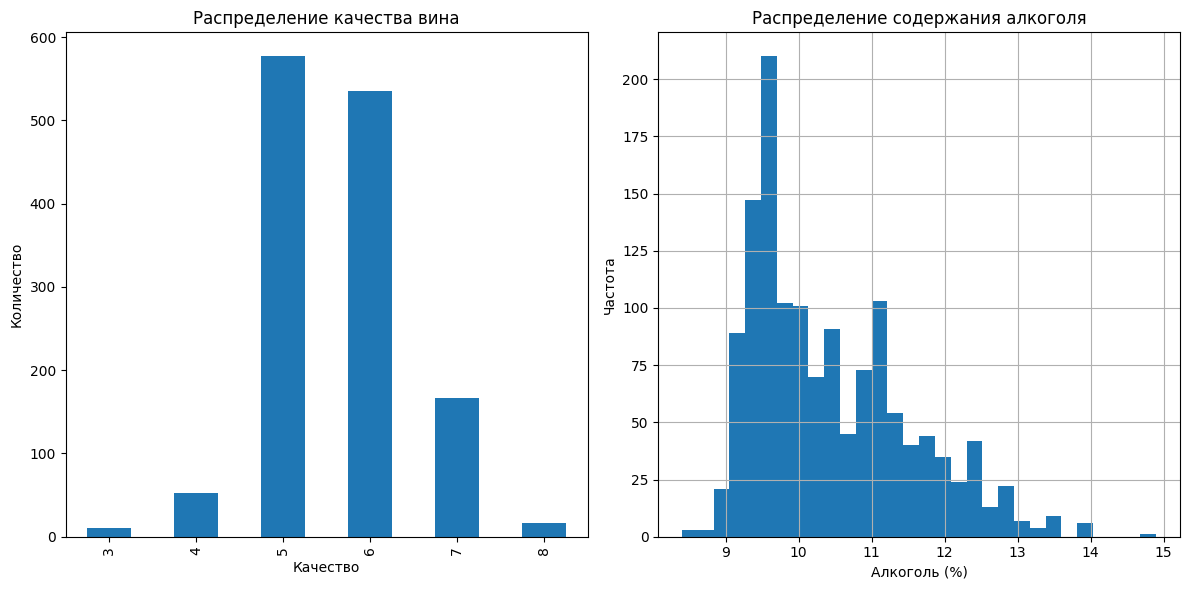

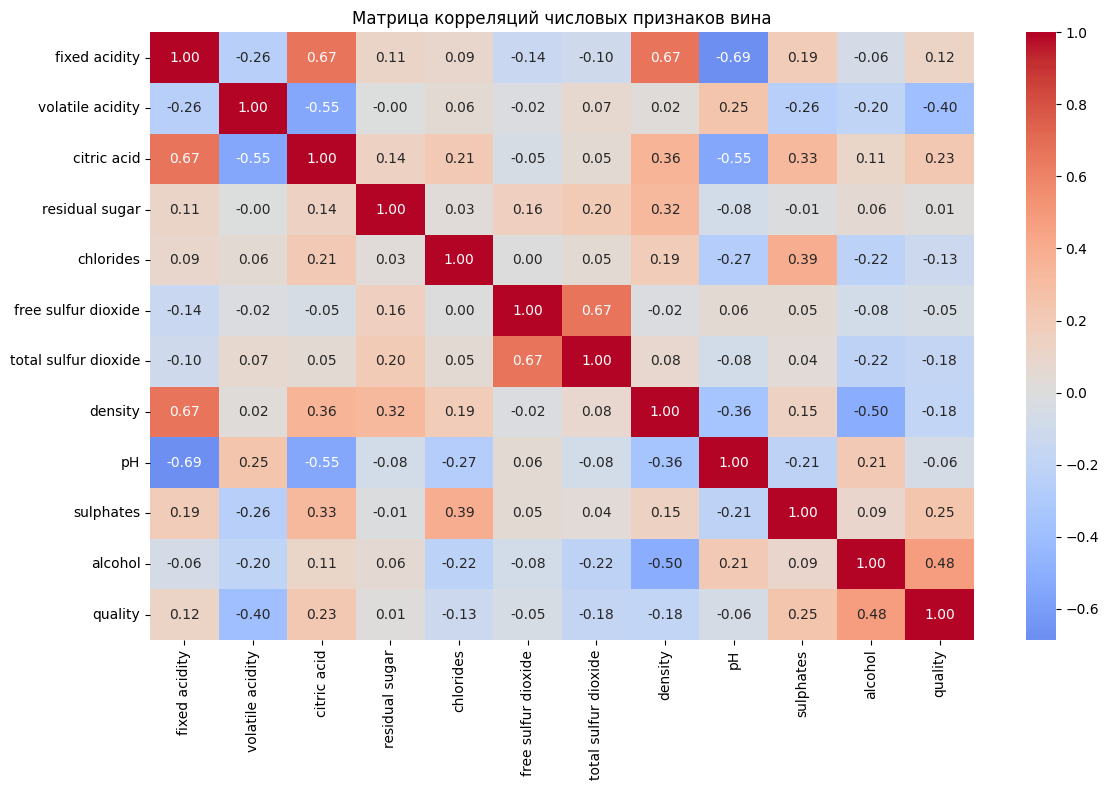

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
vine['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
vine['alcohol'].hist(bins=30)
plt.title('Распределение содержания алкоголя')
plt.xlabel('Алкоголь (%)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
numeric_df = vine.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций числовых признаков вина')
plt.tight_layout()
plt.show()

Выводы:


1.   Самые частые оценки: 5 и 6 баллов
2.   Распределение смещается в сторону средних значений

4. Чем крепче вино, тем выше качество
5. Чем выше летучая кислотность, тем ниже качество
6. Сульфаты не оказывают сильного влияния на качество

 # 1 - Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания для библиотечных реализаций (например, из sklearn) четырёх регрессионных методов.


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

y = vine['quality'].values
X = vine.drop('quality', axis=1)

print(f"{X.shape}, {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

(1359, 11), (1359,)
X_train shape: (1087, 11)
X_test shape: (272, 11)


реализуем Random Forest

In [48]:
import time
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

start = time.time()

forest = RandomForestRegressor(random_state=42)
para_forest = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_forest = GridSearchCV(forest, para_forest, cv=3)
grid_forest.fit(X_train, y_train)

best_forest = grid_forest.best_estimator_
y_pred_fk = best_forest.predict(X_test)
r2_fk = r2_score(y_test, y_pred_fk)
time_fk = time.time() - start

print(f"Время: {time_fk:.1f} сек,\n R2: {r2_fk:.3f}")
print(f"Лучшие параметры: {grid_forest.best_params_}")

Время: 13.7 сек,
 R2: 0.461
Лучшие параметры: {'max_depth': 10, 'n_estimators': 100}


реализация Gradient Boosting

In [49]:
start = time.time()

booster = GradientBoostingRegressor(random_state=42)
para_boo = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.2]}
grid_boo = GridSearchCV(booster, para_boo, cv=3)
grid_boo.fit(X_train, y_train)

best_boom = grid_boo.best_estimator_
y_pred_boo = best_boom.predict(X_test)
r2_boo = r2_score(y_test, y_pred_boo)
time_boo = time.time() - start

print(f"Время: {time_boo} сек,\n R2: {r2_boo}")
print(f"Лучшие параметры: {grid_boo.best_params_}")

Время: 5.691196918487549 сек,
 R2: 0.45944121994732023
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 100}


реализация Ridge Regression

In [50]:
from sklearn.linear_model import Ridge

start = time.time()
bridge = Ridge(random_state=42)
para_bridge = {'alpha': [0.1, 1.0, 10.0]}
grid_bridge = GridSearchCV(bridge, para_bridge, cv=3)
grid_bridge.fit(X_train_scaled, y_train)

best_bridge = grid_bridge.best_estimator_
y_pred_bridge = best_bridge.predict(X_test_scaled)
r2_bridge = r2_score(y_test, y_pred_bridge)
time_bridge = time.time() - start

print(f"Время: {time_bridge} сек, R2: {r2_bridge}")
print(f"Лучшие параметры: {grid_bridge.best_params_}")

Время: 0.05663776397705078 сек, R2: 0.39360342401852655
Лучшие параметры: {'alpha': 10.0}


реализация Lasso

In [51]:
from sklearn.linear_model import Lasso

start = time.time()

lasso = Lasso(random_state=42)
para_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_lassy = GridSearchCV(lasso, para_lasso, cv=3)
grid_lassy.fit(X_train_scaled, y_train)

best_lasso = grid_lassy.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
time_lasso = time.time() - start

print(f"Время: {time_lasso} сек, R2: {r2_lasso}")
print(f"Лучшие параметры: {grid_lassy.best_params_}")

Время: 0.03970813751220703 сек, R2: 0.3418077062146515
Лучшие параметры: {'alpha': 0.1}


Cравникаем

           Модель     R2  Время обучения (сек)
    Random Forest 0.4615                 13.69
Gradient Boosting 0.4594                  5.69
            Ridge 0.3936                  0.06
            Lasso 0.3418                  0.04


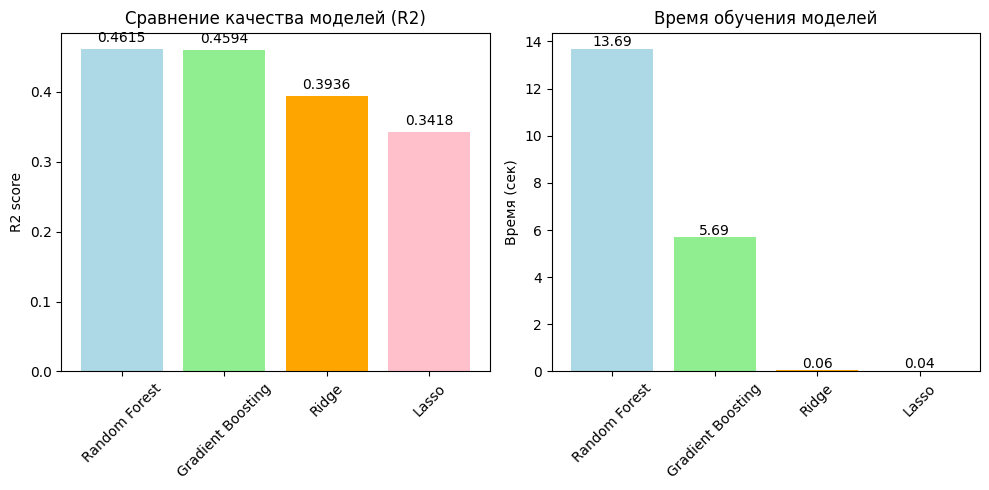

In [53]:
results = {
    'Random Forest': {'model': best_forest, 'r2': r2_fk, 'time': time_fk},
    'Gradient Boosting': {'model': best_boom, 'r2': r2_boo, 'time': time_boo},
    'Ridge': {'model': best_bridge, 'r2': r2_bridge, 'time': time_bridge},
    'Lasso': {'model': best_lasso, 'r2': r2_lasso, 'time': time_lasso}
}

comparison = []
for name, res in results.items():
    comparison.append({
        'Модель': name,
        'R2': round(res['r2'], 4),
        'Время обучения (сек)': round(res['time'], 2)
    })

df_comparison = pd.DataFrame(comparison)
print(df_comparison.to_string(index=False))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
models = df_comparison['Модель']
r2_scores = df_comparison['R2']
colors = ['lightblue', 'lightgreen', 'orange', 'pink']

plt.bar(models, r2_scores, color=colors)
plt.title('Сравнение качества моделей (R2)')
plt.ylabel('R2 score')
plt.xticks(rotation=45)
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, str(v), ha='center')

plt.subplot(1, 2, 2)
times = df_comparison['Время обучения (сек)']
plt.bar(models, times, color=colors)
plt.title('Время обучения моделей')
plt.ylabel('Время (сек)')
plt.xticks(rotation=45)

for i, v in enumerate(times):
    plt.text(i, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

Вывод: Gradient Boosting - лучшая модель тк ее метрика отличается от наивысшей на 21 сотую, но при этом время выполнения задачи отличается больше чем в 2 раза в лучшую сторону.